In [1]:
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from textblob import TextBlob
import networkx as nx
import pandas as pd
import collections
import itertools
import string
import nltk
import re
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [2]:
df = pd.read_csv("vaccination_all_tweets.csv")
df.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


In [3]:
# Examining dataset
df.tail()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
228202,1460170772299665408,VaxBLR,"Bengaluru, India",Hourly updates on FREE and PAID 18+ and 45+ va...,2021-06-21 08:44:34,31,0,0,False,2021-11-15 09:00:15,45+ #URBAN #Bengaluru #CovidVaccine Availabili...,"['URBAN', 'Bengaluru', 'CovidVaccine', 'COVISH...",VaxBlr,0,0,False
228203,1460163268262051841,VaxBLR,"Bengaluru, India",Hourly updates on FREE and PAID 18+ and 45+ va...,2021-06-21 08:44:34,31,0,0,False,2021-11-15 08:30:26,18-44 #BBMP #Bengaluru #CovidVaccine Availabil...,"['BBMP', 'Bengaluru', 'CovidVaccine', 'COVISHI...",VaxBlr,0,1,False
228204,1460163224221851655,VaxBLR,"Bengaluru, India",Hourly updates on FREE and PAID 18+ and 45+ va...,2021-06-21 08:44:34,31,0,0,False,2021-11-15 08:30:15,18-44 #URBAN #Bengaluru #CovidVaccine Availabi...,"['URBAN', 'Bengaluru', 'CovidVaccine', 'COVISH...",VaxBlr,0,0,False
228205,1460156376995573765,Gatti Valentino🐾,Southern Africa,"Entrepreneur, self taught cook🍲🌮 @Chelsea @Fer...",2019-08-28 10:31:43,8103,3113,45726,False,2021-11-15 08:03:03,They promote their Vaccines leaving out the st...,['SputnikV'],Twitter for Android,0,0,False
228206,1460155671140134912,VaxBLR,"Bengaluru, India",Hourly updates on FREE and PAID 18+ and 45+ va...,2021-06-21 08:44:34,31,0,0,False,2021-11-15 08:00:15,45+ #URBAN #Bengaluru #CovidVaccine Availabili...,"['URBAN', 'Bengaluru', 'CovidVaccine', 'COVISH...",VaxBlr,0,0,False


In [4]:
# dataset size
df.shape

(228207, 16)

In [5]:
# dataset statistics
df.describe()

,id,user_followers,user_friends,user_favourites,retweets,favorites
count,2.282070e+05,2.282070e+05,228207.000000,2.282070e+05,228207.000000,228207.000000
mean,1.407541e+18,9.605393e+04,986.736204,1.210417e+04,2.489284,10.819020
std,2.908485e+16,8.389053e+05,5293.500468,3.908233e+04,51.079821,199.527693
min,1.337728e+18,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000
25%,1.381940e+18,5.500000e+01,27.000000,5.700000e+01,0.000000,0.000000
50%,1.408133e+18,3.280000e+02,229.000000,9.960000e+02,0.000000,0.000000
75%,1.428688e+18,1.521000e+03,794.000000,7.300000e+03,1.000000,2.000000
max,1.463251e+18,1.635305e+07,582461.000000,1.299600e+06,12294.000000,54017.000000


In [6]:
#data types
df.dtypes

id                   int64
user_name           object
user_location       object
user_description    object
user_created        object
user_followers       int64
user_friends         int64
user_favourites      int64
user_verified         bool
date                object
text                object
hashtags            object
source              object
retweets             int64
favorites            int64
is_retweet            bool
dtype: object

In [7]:
df["date"][0] #we need to normalize the datas

'2020-12-20 06:06:44'

In [8]:
df['date'] = pd.to_datetime(df['date']).dt.date

In [9]:
df["date"][0]

datetime.date(2020, 12, 20)

In [10]:
#checking null vallues
df.isnull().sum()

id                      0
user_name               2
user_location       66911
user_description    17018
user_created            0
user_followers          0
user_friends            0
user_favourites         0
user_verified           0
date                    0
text                    0
hashtags            49703
source                119
retweets                0
favorites               0
is_retweet              0
dtype: int64

In [11]:
dt = df

# Lowercase
df['text'] = df['text'].str.lower()
df['text']

0         same folks said daikon paste could treat a cyt...
1         while the world has been on the wrong side of ...
2         #coronavirus #sputnikv #astrazeneca #pfizerbio...
3         facts are immutable, senator, even when you're...
4         explain to me again why we need a vaccine @bor...
                                ...                        
228202    45+ #urban #bengaluru #covidvaccine availabili...
228203    18-44 #bbmp #bengaluru #covidvaccine availabil...
228204    18-44 #urban #bengaluru #covidvaccine availabi...
228205    they promote their vaccines leaving out the st...
228206    45+ #urban #bengaluru #covidvaccine availabili...
Name: text, Length: 228207, dtype: object

In [12]:
# remove url
df['text'] = df['text'].apply(lambda x:re.sub(r"http\S+", "", str(x)))
df["text"]

0         same folks said daikon paste could treat a cyt...
1         while the world has been on the wrong side of ...
2         #coronavirus #sputnikv #astrazeneca #pfizerbio...
3         facts are immutable, senator, even when you're...
4         explain to me again why we need a vaccine @bor...
                                ...                        
228202    45+ #urban #bengaluru #covidvaccine availabili...
228203    18-44 #bbmp #bengaluru #covidvaccine availabil...
228204    18-44 #urban #bengaluru #covidvaccine availabi...
228205    they promote their vaccines leaving out the st...
228206    45+ #urban #bengaluru #covidvaccine availabili...
Name: text, Length: 228207, dtype: object

In [13]:
# remove punctuation function
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    punc = string.punctuation
    return text.translate(str.maketrans('', '', punc))

In [14]:
df["text"] = df["text"].apply(lambda text: remove_punctuation(text))
df["text"]

0         same folks said daikon paste could treat a cyt...
1         while the world has been on the wrong side of ...
2         coronavirus sputnikv astrazeneca pfizerbiontec...
3         facts are immutable senator even when youre no...
4         explain to me again why we need a vaccine bori...
                                ...                        
228202    45 urban bengaluru covidvaccine availability f...
228203    1844 bbmp bengaluru covidvaccine availability ...
228204    1844 urban bengaluru covidvaccine availability...
228205    they promote their vaccines leaving out the st...
228206    45 urban bengaluru covidvaccine availability f...
Name: text, Length: 228207, dtype: object

In [15]:
# remove single character and double space 
df["text"] = df["text"].apply(lambda x:re.sub(r'\s+[a-zA-Z]\s+', '', x))
df["text"] = df["text"].apply(lambda x:re.sub(r'\s+', ' ', x, flags=re.I))
df["text"]

0         same folks said daikon paste could treatcytoki...
1         while the world has been on the wrong side of ...
2         coronavirus sputnikv astrazeneca pfizerbiontec...
3         facts are immutable senator even when youre no...
4         explain to me again why we needvaccine borisjo...
                                ...                        
228202    45 urban bengaluru covidvaccine availability f...
228203    1844 bbmp bengaluru covidvaccine availability ...
228204    1844 urban bengaluru covidvaccine availability...
228205    they promote their vaccines leaving out the st...
228206    45 urban bengaluru covidvaccine availability f...
Name: text, Length: 228207, dtype: object

In [16]:
#stopwords are the words which won't bring about any changes 
stop_words = stopwords.words('english')   
len(stop_words),stop_words[:5]

(179, ['i', 'me', 'my', 'myself', 'we'])

In [17]:
def stopwords_remover(tweet):
  return " ".join(word for word in tweet.split() if word not in stop_words)

df["text"] = df["text"].apply(lambda text: stopwords_remover(text))
df["text"]

0         folks said daikon paste could treatcytokine st...
1         world wrong side history year hopefully bigges...
2         coronavirus sputnikv astrazeneca pfizerbiontec...
3         facts immutable senator even youre ethically s...
4         explain needvaccine borisjohnson matthancock w...
                                ...                        
228202    45 urban bengaluru covidvaccine availability 1...
228203    1844 bbmp bengaluru covidvaccine availability ...
228204    1844 urban bengaluru covidvaccine availability...
228205    promote vaccines leaving stronger russia vacci...
228206    45 urban bengaluru covidvaccine availability 1...
Name: text, Length: 228207, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

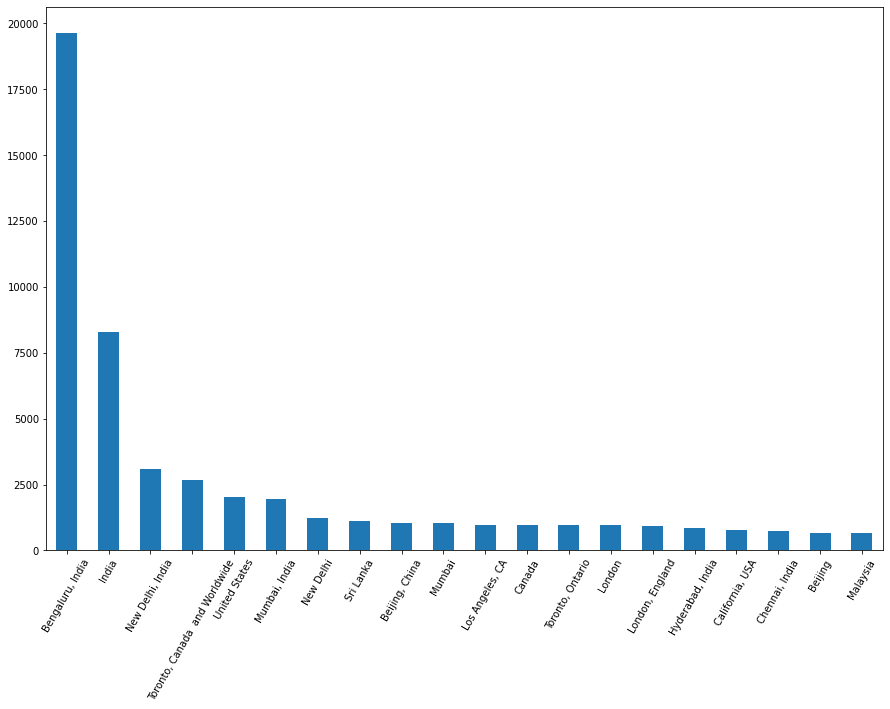

In [18]:
# Visulizing Tweet Count vs Location  
plt.figure(figsize=(15,10))
df['user_location'].value_counts().nlargest(20).plot(kind='bar')
plt.xticks(rotation=60)

In [19]:
df=df.drop_duplicates('text')             #dropping duplicate tweets
df.shape

(213354, 16)

In [20]:
df.source.value_counts()

Twitter for Android      55055
Twitter Web App          53721
Twitter for iPhone       47213
CowinAlertsBot           10644
cowin_vaccine_app        10202
                         ...  
Aida_bot                     1
Senti125                     1
SoCast Digital               1
Gravity Forever              1
Cronachedellacampania        1
Name: source, Length: 368, dtype: int64

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

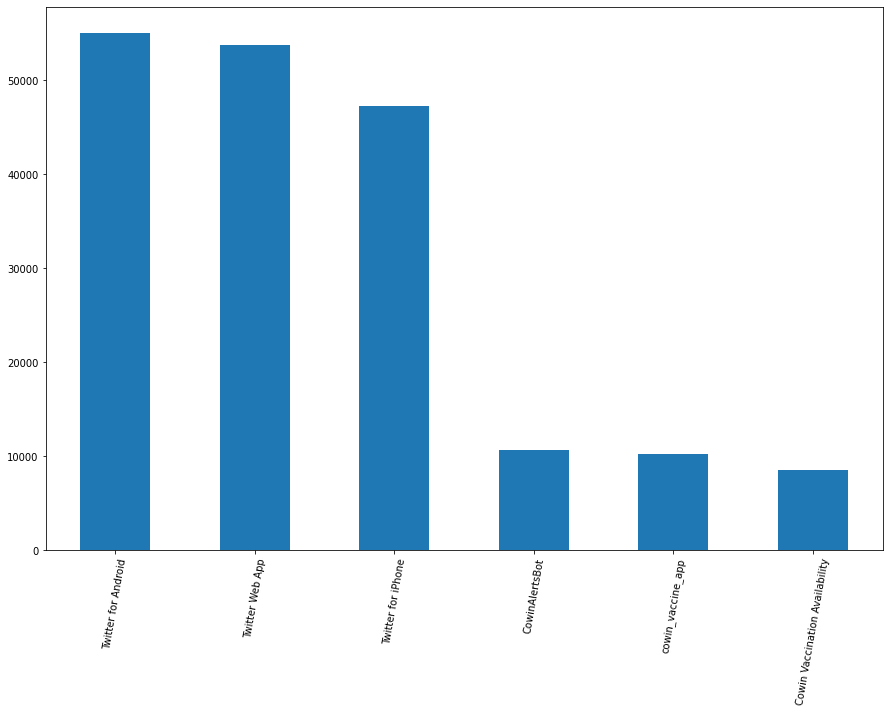

In [21]:
#Visualizing Tweet Platform-wise Distribution 
plt.figure(figsize=(15,10))
df['source'].value_counts().nlargest(6).plot(kind='bar')
plt.xticks(rotation=80)

In [22]:
udate = df['date'].unique()
udate[:5]

array([datetime.date(2020, 12, 20), datetime.date(2020, 12, 13),
       datetime.date(2020, 12, 12), datetime.date(2020, 12, 19),
       datetime.date(2020, 12, 18)], dtype=object)

In [23]:
df.sort_values(by=['date'], ascending=[True]).head(2)

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
292,1337889168895201280,Oigetit Health,"Silicon Valley, CA","Oigetit (Oh, I get it) filters Fake News. Try ...",2015-07-22 19:53:48,952,894,2556,False,2020-12-12,announcement comes federal authorities granted...,NaN,Twitter for iPhone,0,1,False
33,1337742598153383936,Rob of the Green,"Cork, Ireland",In Pursuit of Betterness. I'm doing my bit to ...,2016-12-16 20:29:07,2149,1812,17175,False,2020-12-12,respect due process give approval instead 29th...,NaN,Twitter for iPhone,0,0,False


In [24]:
# remove unneeded data
df.drop(columns={"id","user_name","user_description","user_created","user_followers","user_friends","user_favourites","user_verified","hashtags","source","retweets","favorites","is_retweet"},inplace=True)
df.head(5)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,user_location,date,text
0,"La Crescenta-Montrose, CA",2020-12-20,folks said daikon paste could treatcytokine st...
1,"San Francisco, CA",2020-12-13,world wrong side history year hopefully bigges...
2,Your Bed,2020-12-12,coronavirus sputnikv astrazeneca pfizerbiontec...
3,"Vancouver, BC - Canada",2020-12-12,facts immutable senator even youre ethically s...
4,NaN,2020-12-12,explain needvaccine borisjohnson matthancock w...


In [25]:
pd.set_option('display.max_colwidth', 700)
df.head()

,user_location,date,text
0,"La Crescenta-Montrose, CA",2020-12-20,folks said daikon paste could treatcytokine storm pfizerbiontech
1,"San Francisco, CA",2020-12-13,world wrong side history year hopefully biggest vaccination effort weve ev…
2,Your Bed,2020-12-12,coronavirus sputnikv astrazeneca pfizerbiontech moderna covid19 russian vaccine created last 24 years…
3,"Vancouver, BC - Canada",2020-12-12,facts immutable senator even youre ethically sturdy enough acknowledge 1 born i…
4,NaN,2020-12-12,explain needvaccine borisjohnson matthancock whereareallthesickpeople pfizerbiontech…


(-0.5, 999.5, 499.5, -0.5)

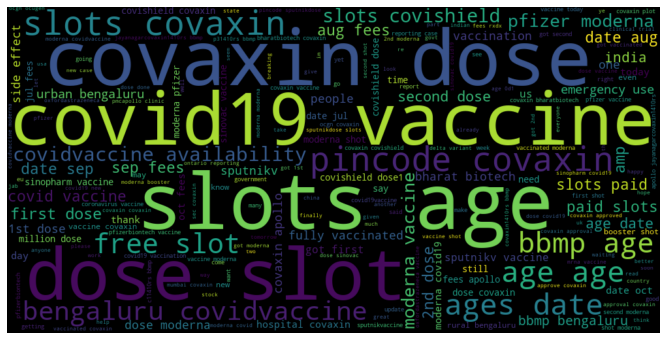

In [26]:
# word cloud
words = ' '.join([word for word in df['text']])
word_cloud = WordCloud(width=1000, height=500, random_state=20, max_font_size=120).generate(words)

fig, ax = plt.subplots(figsize=(12,6))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')

# Sentiment Analysis

In [27]:
# sentiment analysis functions
def get_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def get_polarity(text):
    return TextBlob(text).sentiment.polarity

def get_sentiment(score):
    if score > 0:
        return 'Positive'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Negative'


In [28]:
df['subjectivity'] = df['text'].apply(get_subjectivity)
df['polarity'] = df['text'].apply(get_polarity)
df['sentiment'] = df['polarity'].apply(get_sentiment)
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

,user_location,date,text,subjectivity,polarity,sentiment
0,"La Crescenta-Montrose, CA",2020-12-20,folks said daikon paste could treatcytokine storm pfizerbiontech,0.000000,0.0,Neutral
1,"San Francisco, CA",2020-12-13,world wrong side history year hopefully biggest vaccination effort weve ev…,0.900000,-0.5,Negative
2,Your Bed,2020-12-12,coronavirus sputnikv astrazeneca pfizerbiontech moderna covid19 russian vaccine created last 24 years…,0.033333,0.0,Neutral
3,"Vancouver, BC - Canada",2020-12-12,facts immutable senator even youre ethically sturdy enough acknowledge 1 born i…,0.550000,0.1,Positive
4,NaN,2020-12-12,explain needvaccine borisjohnson matthancock whereareallthesickpeople pfizerbiontech…,0.000000,0.0,Neutral


(-0.5, 999.5, 499.5, -0.5)

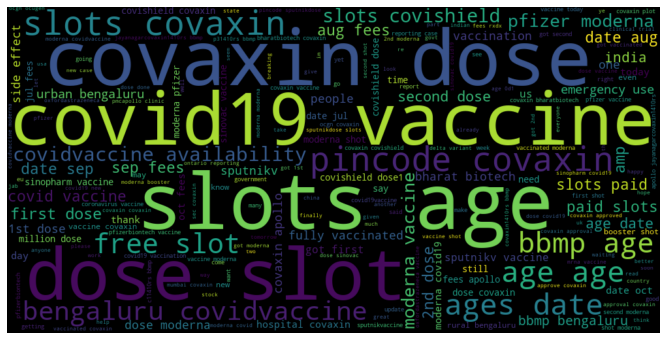

In [29]:
# word cloud
words = ' '.join([word for word in df['text']])
word_cloud = WordCloud(width=1000, height=500, random_state=20, max_font_size=120).generate(words)

fig, ax = plt.subplots(figsize=(12,6))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')

In [82]:
graph = nx.from_pandas_edgelist(df.head(100), source="sentiment", target="text")

In [83]:
graph.nodes()

NodeView(('Neutral', 'folks said daikon paste could treatcytokine storm pfizerbiontech', 'Negative', 'world wrong side history year hopefully biggest vaccination effort weve ev…', 'coronavirus sputnikv astrazeneca pfizerbiontech moderna covid19 russian vaccine created last 24 years…', 'Positive', 'facts immutable senator even youre ethically sturdy enough acknowledge 1 born i…', 'explain needvaccine borisjohnson matthancock whereareallthesickpeople pfizerbiontech…', 'anyone useful adviceguidance whether covid vaccine safe whilst breastfeeding…', 'isbit sad claim fame success vaccination patriotic competition usa canada uk and…', 'many bright days 2020 best 1 bidenharris winning election2020…', 'covid vaccine getting covidvaccine covid19 pfizerbiontech moderna', 'covidvaccine states start getting covid19vaccine monday us says pakustv nyc healthcare globalgoals…', 'deaths closing 300000 mark millions people wait pfizerbiontech vaccine first u…', 'cnnbrk covid19 covidvaccine vaccine coron

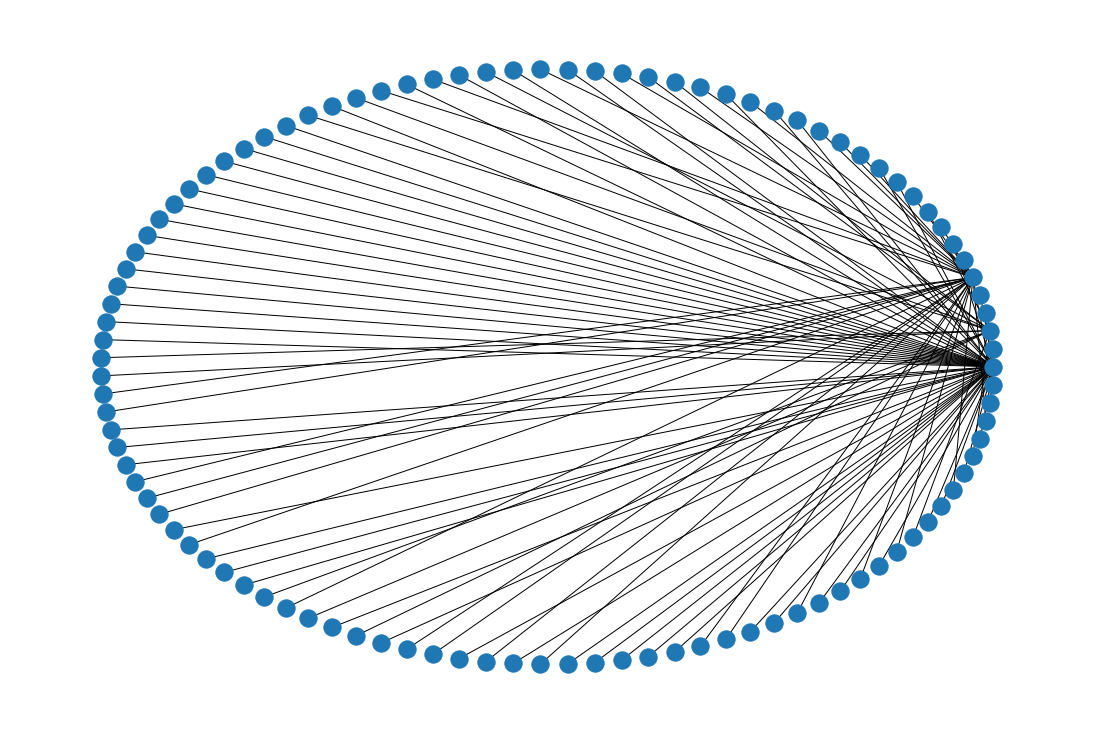

In [86]:
plt.figure(figsize=(15, 10))
nx.draw_circular(graph, with_labels = False)

# Co-occurrence - Bigram

In [33]:
# Create list of lists containing bigrams in tweets
tweet_bigram = [list(nltk.bigrams(tweet.split())) for tweet in df['text']]

# View bigrams for the first tweet
tweet_bigram[4]


[('explain', 'needvaccine'),
 ('needvaccine', 'borisjohnson'),
 ('borisjohnson', 'matthancock'),
 ('matthancock', 'whereareallthesickpeople'),
 ('whereareallthesickpeople', 'pfizerbiontech…')]

In [35]:
bigrams = list(itertools.chain(*tweet_bigram))
# add frequency
counts = collections.Counter(bigrams)
counts.most_common(5)

[(('age', '18'), 18378),
 (('slots', 'age'), 11579),
 (('2021', 'fees'), 11431),
 (('covaxin', 'dose'), 10855),
 (('slots', 'covaxin'), 10500)]

In [36]:
# create dataframe
bdf = pd.DataFrame(counts.most_common(100),columns=['bigram', 'count'])
bdf.head(5)

,bigram,count
0,"(age, 18)",18378
1,"(slots, age)",11579
2,"(2021, fees)",11431
3,"(covaxin, dose)",10855
4,"(slots, covaxin)",10500


## NetworkX of Co-ocurence


In [37]:
graph = nx.from_pandas_edgelist(bdf, source="bigram", target="count")

In [38]:
nx.info(graph)

'Graph with 195 nodes and 100 edges'

In [39]:
# check graph nodes
graph.nodes()

NodeView((('age', '18'), 18378, ('slots', 'age'), 11579, ('2021', 'fees'), 11431, ('covaxin', 'dose'), 10855, ('slots', 'covaxin'), 10500, ('covid19', 'vaccine'), 8288, ('18', 'ages'), 8070, ('ages', 'date'), ('fees', '₹1410'), 7723, ('free', 'slots'), 6955, ('covidvaccine', 'availability'), 6951, ('bengaluru', 'covidvaccine'), 6948, ('slots', 'covishield'), 6502, ('dose', '2'), 6055, ('dose', '1'), 5837, ('pfizer', 'moderna'), 5028, ('moderna', 'vaccine'), 4379, ('first', 'dose'), 4139, ('paid', 'slots'), 4014, ('slots', '0'), 4013, ('0', 'paid'), 3998, ('sep', '2021'), 3971, ('aug', '2021'), 3767, ('2nd', 'dose'), 3610, ('age', '45'), 3409, ('second', 'dose'), 3330, ('bbmp', 'bengaluru'), 2988, ('50', 'slots'), 2912, ('covid', 'vaccine'), 2891, ('urban', 'bengaluru'), 2751, ('emergency', 'use'), 2629, ('fully', 'vaccinated'), 2503, ('covid19', 'vaccines'), 2385, ('got', 'first'), 2304, ('1st', 'dose'), 2290, ('side', 'effects'), 2142, ('100', 'slots'), 2093, ('oct', '2021'), 2036, ('

In [41]:
# check edges
graph.edges()

EdgeView([(('age', '18'), 18378), (('slots', 'age'), 11579), (('2021', 'fees'), 11431), (('covaxin', 'dose'), 10855), (('slots', 'covaxin'), 10500), (('covid19', 'vaccine'), 8288), (('18', 'ages'), 8070), (8070, ('ages', 'date')), (('fees', '₹1410'), 7723), (('free', 'slots'), 6955), (('covidvaccine', 'availability'), 6951), (('bengaluru', 'covidvaccine'), 6948), (('slots', 'covishield'), 6502), (('dose', '2'), 6055), (('dose', '1'), 5837), (('pfizer', 'moderna'), 5028), (('moderna', 'vaccine'), 4379), (('first', 'dose'), 4139), (('paid', 'slots'), 4014), (('slots', '0'), 4013), (('0', 'paid'), 3998), (('sep', '2021'), 3971), (('aug', '2021'), 3767), (('2nd', 'dose'), 3610), (('age', '45'), 3409), (('second', 'dose'), 3330), (('bbmp', 'bengaluru'), 2988), (('50', 'slots'), 2912), (('covid', 'vaccine'), 2891), (('urban', 'bengaluru'), 2751), (('emergency', 'use'), 2629), (('fully', 'vaccinated'), 2503), (('covid19', 'vaccines'), 2385), (('got', 'first'), 2304), (('1st', 'dose'), 2290), 

In [40]:
nx.degree_centrality(graph)

{('0', 'paid'): 0.005154639175257732,
 ('1', '100'): 0.005154639175257732,
 ('1', '50'): 0.005154639175257732,
 ('100', 'slots'): 0.005154639175257732,
 ('18', '44'): 0.005154639175257732,
 ('18', 'ages'): 0.005154639175257732,
 ('18', 'date'): 0.005154639175257732,
 ('1844', 'bbmp'): 0.005154639175257732,
 ('1844', 'rural'): 0.005154639175257732,
 ('1844', 'urban'): 0.005154639175257732,
 ('1st', 'dose'): 0.005154639175257732,
 ('2', '100'): 0.005154639175257732,
 ('2', '50'): 0.005154639175257732,
 ('20', 'slots'): 0.005154639175257732,
 ('2021', 'fees'): 0.005154639175257732,
 ('25', 'slots'): 0.005154639175257732,
 ('2nd', 'dose'): 0.005154639175257732,
 ('30', 'slots'): 0.005154639175257732,
 ('44', 'date'): 0.005154639175257732,
 ('45', 'bbmp'): 0.005154639175257732,
 ('45', 'urban'): 0.005154639175257732,
 ('50', 'slots'): 0.005154639175257732,
 ('560011', 'age'): 0.005154639175257732,
 ('560066', 'age'): 0.005154639175257732,
 ('560076', 'age'): 0.005154639175257732,
 ('age', '

In [42]:
nx.closeness_centrality(graph)

{('0', 'paid'): 0.005154639175257732,
 ('1', '100'): 0.005154639175257732,
 ('1', '50'): 0.005154639175257732,
 ('100', 'slots'): 0.005154639175257732,
 ('18', '44'): 0.005154639175257732,
 ('18', 'ages'): 0.006872852233676976,
 ('18', 'date'): 0.005154639175257732,
 ('1844', 'bbmp'): 0.006872852233676976,
 ('1844', 'rural'): 0.005154639175257732,
 ('1844', 'urban'): 0.005154639175257732,
 ('1st', 'dose'): 0.005154639175257732,
 ('2', '100'): 0.006872852233676976,
 ('2', '50'): 0.005154639175257732,
 ('20', 'slots'): 0.005154639175257732,
 ('2021', 'fees'): 0.005154639175257732,
 ('25', 'slots'): 0.005154639175257732,
 ('2nd', 'dose'): 0.005154639175257732,
 ('30', 'slots'): 0.005154639175257732,
 ('44', 'date'): 0.005154639175257732,
 ('45', 'bbmp'): 0.005154639175257732,
 ('45', 'urban'): 0.005154639175257732,
 ('50', 'slots'): 0.005154639175257732,
 ('560011', 'age'): 0.005154639175257732,
 ('560066', 'age'): 0.005154639175257732,
 ('560076', 'age'): 0.005154639175257732,
 ('age', '

In [43]:
nx.betweenness_centrality(graph)

{('0', 'paid'): 0.0,
 ('1', '100'): 0.0,
 ('1', '50'): 0.0,
 ('100', 'slots'): 0.0,
 ('18', '44'): 0.0,
 ('18', 'ages'): 0.0,
 ('18', 'date'): 0.0,
 ('1844', 'bbmp'): 0.0,
 ('1844', 'rural'): 0.0,
 ('1844', 'urban'): 0.0,
 ('1st', 'dose'): 0.0,
 ('2', '100'): 0.0,
 ('2', '50'): 0.0,
 ('20', 'slots'): 0.0,
 ('2021', 'fees'): 0.0,
 ('25', 'slots'): 0.0,
 ('2nd', 'dose'): 0.0,
 ('30', 'slots'): 0.0,
 ('44', 'date'): 0.0,
 ('45', 'bbmp'): 0.0,
 ('45', 'urban'): 0.0,
 ('50', 'slots'): 0.0,
 ('560011', 'age'): 0.0,
 ('560066', 'age'): 0.0,
 ('560076', 'age'): 0.0,
 ('age', '18'): 0.0,
 ('age', '45'): 0.0,
 ('ages', 'date'): 0.0,
 ('apollo', 'jayanagarcovaxin1410rs'): 0.0,
 ('aug', '2021'): 0.0,
 ('bbmp', 'bengaluru'): 0.0,
 ('bengaluru', 'covidvaccine'): 0.0,
 ('bharat', 'biotech'): 0.0,
 ('c11410rs', 'bbmp'): 0.0,
 ('covaxin', '24072021'): 0.0,
 ('covaxin', 'bharatbiotech'): 0.0,
 ('covaxin', 'covishield'): 0.0,
 ('covaxin', 'dose'): 0.0,
 ('covaxin', 'plot'): 0.0,
 ('covid', 'vaccine'): 0.

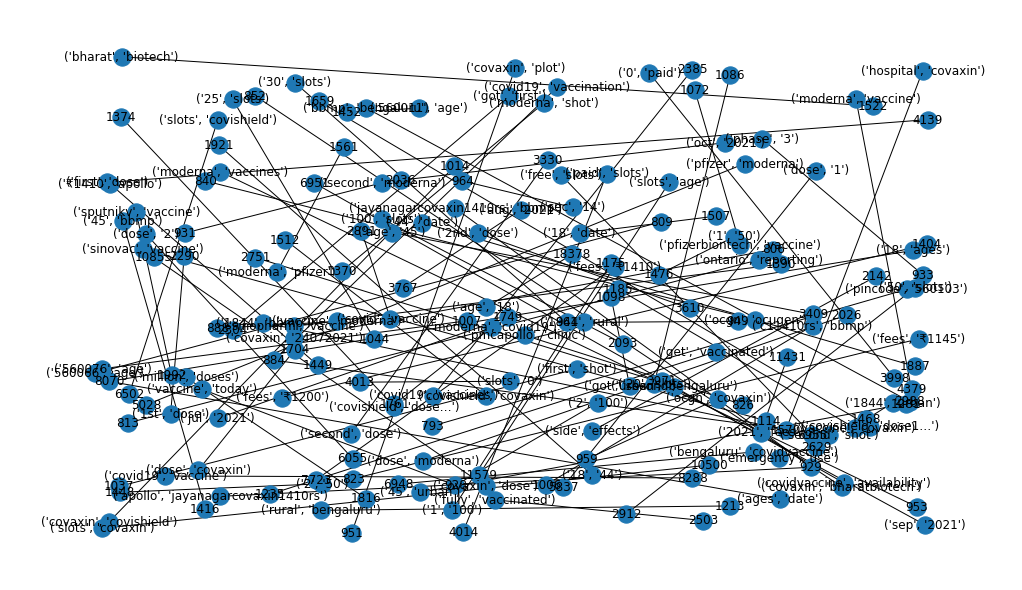

In [75]:
plt.figure(figsize=(14, 8))
nx.draw_random(graph, with_labels=True)

# Analyse Trends from Twitter

In [45]:
import tweepy
import time

In [46]:
#  you will need to replace these with your own api key and access tocken

auth = tweepy.OAuthHandler("tzXVI4tjJvDXiF0VqvuZFtQml", "BQoVptuT2OJYppN9AQsm8D6mfG27U2w9a4qE7tFoGPCc8HQaTU")
auth.set_access_token("4457606068-wjH5KweZtGgcTRT20C5kZHHsRhvww0Q3BJzBfay", "1wLufJIWFQYcpxTBhhBEhvrOB0XpGIsz8WtPlqjqW05ln")
api = tweepy.API(auth)

In [47]:
# function fetches recent tweet of each user in the dataset
def createTrainingSet(corpus):
    trainingDataSet = []

    for index, tweet in corpus.iterrows():
        # print(tweet['user_name'])
        try:
            tweetFetched = api.user_timeline(screen_name = "".join(tweet['user_name'].split()), count=1,tweet_mode = 'extended',
            include_rts=False)
            trainingDataSet.append(tweetFetched)

        except Exception as e:
            # print(f"{e}")
            continue
    return trainingDataSet


In [48]:
td = createTrainingSet(dt.head(400))

In [49]:
l =[i[0]._json for i in td if i != []]
tdf = pd.json_normalize(l)
tdf.head()


,created_at,id,id_str,full_text,truncated,display_text_range,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,lang,entities.hashtags,entities.symbols,entities.user_mentions,entities.urls,user.id,user.id_str,user.name,user.screen_name,user.location,user.description,user.url,user.entities.url.urls,user.entities.description.urls,user.protected,user.followers_count,user.friends_count,user.listed_count,user.created_at,...,quoted_status.user.profile_image_url_https,quoted_status.user.profile_link_color,quoted_status.user.profile_sidebar_border_color,quoted_status.user.profile_sidebar_fill_color,quoted_status.user.profile_text_color,quoted_status.user.profile_use_background_image,quoted_status.user.has_extended_profile,quoted_status.user.default_profile,quoted_status.user.default_profile_image,quoted_status.user.following,quoted_status.user.follow_request_sent,quoted_status.user.notifications,quoted_status.user.translator_type,quoted_status.user.withheld_in_countries,quoted_status.geo,quoted_status.coordinates,quoted_status.place,quoted_status.contributors,quoted_status.is_quote_status,quoted_status.retweet_count,quoted_status.favorite_count,quoted_status.favorited,quoted_status.retweeted,quoted_status.lang,entities.media,extended_entities.media,quoted_status.user.profile_banner_url,quoted_status.possibly_sensitive,quoted_status.entities.media,quoted_status.extended_entities.media,place.id,place.url,place.place_type,place.name,place.full_name,place.country_code,place.country,place.contained_within,place.bounding_box.type,place.bounding_box.coordinates
0,Thu Dec 02 17:28:59 +0000 2021,1466459393629687809,1466459393629687809,You crazy!,False,"[0, 10]","<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",1.464055e+18,1464055090310877191,2.977397e+07,29773974,RachelRoh,None,None,NaN,None,False,0,0,False,False,en,[],[],[],[],29773974,29773974,Rachel Roh,RachelRoh,"La Crescenta-Montrose, CA","WE KNEW IT WOULD COME TO THIS.\nAggregator of Asian American news; scanning diverse sources 24/7/365. RT's, Follows and 'Likes' will fuel me 👩‍💻",https://t.co/3BC06OLMB1,"[{'url': 'https://t.co/3BC06OLMB1', 'expanded_url': 'https://muckrack.com/rachel-roh', 'display_url': 'muckrack.com/rachel-roh', 'indices': [0, 23]}]",[],False,469,1915,8,Wed Apr 08 17:52:46 +0000 2009,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Thu Dec 02 03:46:57 +0000 2021,1466252520418856969,1466252520418856969,How can MLB be more irrelevant?\n\nOh. https://t.co/rZfPJSHN2d,False,"[0, 36]","<a href=""https://mobile.twitter.com"" rel=""nofollow"">Twitter Web App</a>",NaN,None,NaN,None,None,None,None,NaN,None,True,0,0,False,False,en,[],[],[],"[{'url': 'https://t.co/rZfPJSHN2d', 'expanded_url': 'https://twitter.com/JonHeyman/status/1466249636927127556', 'display_url': 'twitter.com/JonHeyman/stat…', 'indices': [37, 60]}]",33334138,33334138,💉💉Albert Fong 🤜🤛🏿,albertfong,Treaty 13A,"Citizen, Teacher, Partner, Parent, He/Him. Twitter bios are a glimpse into what ppl use this for.\nI only roast the ones I love\n#StopAsianHate",None,NaN,[],False,2385,2258,106,Sun Apr 19 22:59:19 +0000 2009,...,https://pbs.twimg.com/profile_images/1405853164256075785/_kFWHQvy_normal.jpg,000000,EEEEEE,EFEFEF,333333,True,False,False,False,False,False,False,none,[],NaN,NaN,NaN,NaN,False,2080.0,7095.0,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Thu Dec 02 17:48:40 +0000 2021,1466464344657448961,1466464344657448961,The Three Classiest Canadians Sports Broadcasters I've had the pleasure of sharing a microphone with (1) Bob Irving (2) Don Wittman (3) Brian Williams. Happy 50th Brian! https://t.co/9wrDb86n9i https://t.co/EHZbHYF5bx,False,"[0, 195]","<a

In [50]:
graph2 = nx.from_pandas_edgelist(tdf.head(20), source="user.name", target="user.location")


In [51]:
graph2.nodes()

NodeView(('Rachel Roh', 'La Crescenta-Montrose, CA', '💉💉Albert Fong 🤜🤛🏿', 'Treaty 13A', 'Charles Adler', 'Western Canada ', 'Dee', '', 'Tamer Yazar', 'Turkey-Israel', 'nancy', 'DOCNOS Official', 'Michael Jerome Finn', 'Danville , PA', '🎵🎻🎵', 'Contagion: Outbreak', 'Omaha, NE', 'Rob of the Green Presents', 'Cork, Ireland', 'John Berry', 'Los Angeles, CA, United States', 'khuntson', 'Daily News Egypt', 'Egypt', 'Nicolas Cianca', 'New York City!', 'Euranet Plus', 'The European Union', 'karthikraja', 'Dallas, TX', 'Kristy de los santos', 'La Julia, Dominican Republic'))

In [52]:
graph2.edges()

EdgeView([('Rachel Roh', 'La Crescenta-Montrose, CA'), ('💉💉Albert Fong 🤜🤛🏿', 'Treaty 13A'), ('Charles Adler', 'Western Canada '), ('Dee', ''), ('', 'nancy'), ('', 'DOCNOS Official'), ('', '🎵🎻🎵'), ('', 'khuntson'), ('Tamer Yazar', 'Turkey-Israel'), ('Michael Jerome Finn', 'Danville , PA'), ('Contagion: Outbreak', 'Omaha, NE'), ('Rob of the Green Presents', 'Cork, Ireland'), ('John Berry', 'Los Angeles, CA, United States'), ('Daily News Egypt', 'Egypt'), ('Nicolas Cianca', 'New York City!'), ('Euranet Plus', 'The European Union'), ('karthikraja', 'Dallas, TX'), ('Kristy de los santos', 'La Julia, Dominican Republic')])

In [53]:
nx.betweenness_centrality(graph2)

{'': 0.021505376344086023,
 'Charles Adler': 0.0,
 'Contagion: Outbreak': 0.0,
 'Cork, Ireland': 0.0,
 'DOCNOS Official': 0.0,
 'Daily News Egypt': 0.0,
 'Dallas, TX': 0.0,
 'Danville , PA': 0.0,
 'Dee': 0.0,
 'Egypt': 0.0,
 'Euranet Plus': 0.0,
 'John Berry': 0.0,
 'Kristy de los santos': 0.0,
 'La Crescenta-Montrose, CA': 0.0,
 'La Julia, Dominican Republic': 0.0,
 'Los Angeles, CA, United States': 0.0,
 'Michael Jerome Finn': 0.0,
 'New York City!': 0.0,
 'Nicolas Cianca': 0.0,
 'Omaha, NE': 0.0,
 'Rachel Roh': 0.0,
 'Rob of the Green Presents': 0.0,
 'Tamer Yazar': 0.0,
 'The European Union': 0.0,
 'Treaty 13A': 0.0,
 'Turkey-Israel': 0.0,
 'Western Canada ': 0.0,
 'karthikraja': 0.0,
 'khuntson': 0.0,
 'nancy': 0.0,
 '🎵🎻🎵': 0.0,
 '💉💉Albert Fong 🤜🤛🏿': 0.0}

In [54]:
nx.closeness_centrality(graph2)

{'': 0.16129032258064516,
 'Charles Adler': 0.03225806451612903,
 'Contagion: Outbreak': 0.03225806451612903,
 'Cork, Ireland': 0.03225806451612903,
 'DOCNOS Official': 0.08960573476702509,
 'Daily News Egypt': 0.03225806451612903,
 'Dallas, TX': 0.03225806451612903,
 'Danville , PA': 0.03225806451612903,
 'Dee': 0.08960573476702509,
 'Egypt': 0.03225806451612903,
 'Euranet Plus': 0.03225806451612903,
 'John Berry': 0.03225806451612903,
 'Kristy de los santos': 0.03225806451612903,
 'La Crescenta-Montrose, CA': 0.03225806451612903,
 'La Julia, Dominican Republic': 0.03225806451612903,
 'Los Angeles, CA, United States': 0.03225806451612903,
 'Michael Jerome Finn': 0.03225806451612903,
 'New York City!': 0.03225806451612903,
 'Nicolas Cianca': 0.03225806451612903,
 'Omaha, NE': 0.03225806451612903,
 'Rachel Roh': 0.03225806451612903,
 'Rob of the Green Presents': 0.03225806451612903,
 'Tamer Yazar': 0.03225806451612903,
 'The European Union': 0.03225806451612903,
 'Treaty 13A': 0.0322580

In [55]:
nx.degree_centrality(graph2)

{'': 0.16129032258064516,
 'Charles Adler': 0.03225806451612903,
 'Contagion: Outbreak': 0.03225806451612903,
 'Cork, Ireland': 0.03225806451612903,
 'DOCNOS Official': 0.03225806451612903,
 'Daily News Egypt': 0.03225806451612903,
 'Dallas, TX': 0.03225806451612903,
 'Danville , PA': 0.03225806451612903,
 'Dee': 0.03225806451612903,
 'Egypt': 0.03225806451612903,
 'Euranet Plus': 0.03225806451612903,
 'John Berry': 0.03225806451612903,
 'Kristy de los santos': 0.03225806451612903,
 'La Crescenta-Montrose, CA': 0.03225806451612903,
 'La Julia, Dominican Republic': 0.03225806451612903,
 'Los Angeles, CA, United States': 0.03225806451612903,
 'Michael Jerome Finn': 0.03225806451612903,
 'New York City!': 0.03225806451612903,
 'Nicolas Cianca': 0.03225806451612903,
 'Omaha, NE': 0.03225806451612903,
 'Rachel Roh': 0.03225806451612903,
 'Rob of the Green Presents': 0.03225806451612903,
 'Tamer Yazar': 0.03225806451612903,
 'The European Union': 0.03225806451612903,
 'Treaty 13A': 0.0322580

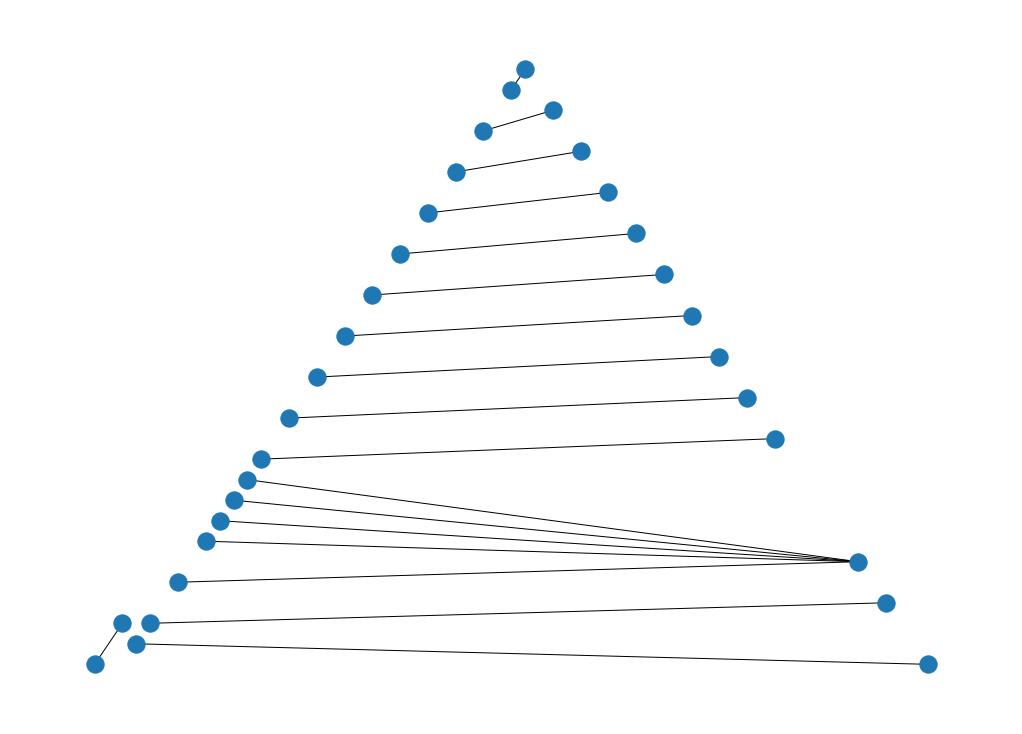

In [74]:
plt.figure(figsize=(14, 10))
nx.draw_planar(graph2, with_labels=False)

## Spotting Trends

In [57]:
trend_list = [i['text'] for x in tdf['entities.hashtags'].tolist() for i in x if x != []]

len(trend_list)
tl = counts = collections.Counter(trend_list)
# tl
hashtags_list_df = pd.DataFrame(tl.items(), columns=['hashtag', 'count'])

In [58]:
#  top 10 trending according to our data
tl.most_common(10)

[('CdnPoli', 9),
 ('CdnMedia', 9),
 ('Omicron', 7),
 ('NewCOVID19Variant', 5),
 ('NewYorkCity', 5),
 ('US', 5),
 ('SCOTUS', 3),
 ('Dobbs', 3),
 ('DobbsvJackson', 3),
 ('abortion', 3)]

In [59]:
hashtags_list_df.head()

,hashtag,count
0,serotonin,1
1,Medical,1
2,MentalHealth,1
3,docnos,1
4,docnosofficial,1


In [61]:
graph4 = nx.from_pandas_edgelist(hashtags_list_df, source="hashtag", target="count")

In [62]:
nx.closeness_centrality(graph4)

{1: 0.73,
 2: 0.1,
 3: 0.06,
 5: 0.03,
 7: 0.01,
 9: 0.02,
 'Africannations': 0.36751724137931036,
 'Barranquilla': 0.05263157894736842,
 'Berhampur': 0.36751724137931036,
 'BigTech': 0.36751724137931036,
 'BiggBossTamil4': 0.36751724137931036,
 'Biotechnology': 0.36751724137931036,
 'COVID19': 0.05263157894736842,
 'CdnMedia': 0.013333333333333332,
 'CdnPoli': 0.013333333333333332,
 'Christmas': 0.36751724137931036,
 'Christmasgifts': 0.36751724137931036,
 'Colombia': 0.05263157894736842,
 'CovidVaccine': 0.36751724137931036,
 'Covid_19': 0.36751724137931036,
 'DMA': 0.36751724137931036,
 'DSA': 0.36751724137931036,
 'DavenportTO': 0.36751724137931036,
 'Dobbs': 0.03272727272727272,
 'DobbsvJackson': 0.03272727272727272,
 'DoritosDewDrop': 0.36751724137931036,
 'DubNation': 0.36751724137931036,
 'Ethiopia': 0.36751724137931036,
 'Freud': 0.36751724137931036,
 'GenderBasedViolence': 0.36751724137931036,
 'GettyNews': 0.05263157894736842,
 'HAIR': 0.36751724137931036,
 'HAIRFOLLICLE': 0

In [63]:
nx.betweenness_centrality(graph4)

{1: 0.5309090909090909,
 2: 0.00909090909090909,
 3: 0.0030303030303030303,
 5: 0.0006060606060606061,
 7: 0.0,
 9: 0.00020202020202020202,
 'Africannations': 0.0,
 'Barranquilla': 0.0,
 'Berhampur': 0.0,
 'BigTech': 0.0,
 'BiggBossTamil4': 0.0,
 'Biotechnology': 0.0,
 'COVID19': 0.0,
 'CdnMedia': 0.0,
 'CdnPoli': 0.0,
 'Christmas': 0.0,
 'Christmasgifts': 0.0,
 'Colombia': 0.0,
 'CovidVaccine': 0.0,
 'Covid_19': 0.0,
 'DMA': 0.0,
 'DSA': 0.0,
 'DavenportTO': 0.0,
 'Dobbs': 0.0,
 'DobbsvJackson': 0.0,
 'DoritosDewDrop': 0.0,
 'DubNation': 0.0,
 'Ethiopia': 0.0,
 'Freud': 0.0,
 'GenderBasedViolence': 0.0,
 'GettyNews': 0.0,
 'HAIR': 0.0,
 'HAIRFOLLICLE': 0.0,
 'HojeÉUmNovoDia': 0.0,
 'Hongkong': 0.0,
 'Infosys': 0.0,
 'InfosysPrize2021': 0.0,
 'InfosysScienceFoundation': 0.0,
 'IvanDuque': 0.0,
 'Jam': 0.0,
 'KingFelipeVI': 0.0,
 'Lebanon': 0.0,
 'MUNARS': 0.0,
 'MaghribMinute': 0.0,
 'Medical': 0.0,
 'MentalHealth': 0.0,
 'MurdochGutterMedia': 0.0,
 'NHL': 0.0,
 'NewCOVID19Variant': 0.

In [64]:
nx.degree_centrality(graph4)

{1: 0.73,
 2: 0.1,
 3: 0.06,
 5: 0.03,
 7: 0.01,
 9: 0.02,
 'Africannations': 0.01,
 'Barranquilla': 0.01,
 'Berhampur': 0.01,
 'BigTech': 0.01,
 'BiggBossTamil4': 0.01,
 'Biotechnology': 0.01,
 'COVID19': 0.01,
 'CdnMedia': 0.01,
 'CdnPoli': 0.01,
 'Christmas': 0.01,
 'Christmasgifts': 0.01,
 'Colombia': 0.01,
 'CovidVaccine': 0.01,
 'Covid_19': 0.01,
 'DMA': 0.01,
 'DSA': 0.01,
 'DavenportTO': 0.01,
 'Dobbs': 0.01,
 'DobbsvJackson': 0.01,
 'DoritosDewDrop': 0.01,
 'DubNation': 0.01,
 'Ethiopia': 0.01,
 'Freud': 0.01,
 'GenderBasedViolence': 0.01,
 'GettyNews': 0.01,
 'HAIR': 0.01,
 'HAIRFOLLICLE': 0.01,
 'HojeÉUmNovoDia': 0.01,
 'Hongkong': 0.01,
 'Infosys': 0.01,
 'InfosysPrize2021': 0.01,
 'InfosysScienceFoundation': 0.01,
 'IvanDuque': 0.01,
 'Jam': 0.01,
 'KingFelipeVI': 0.01,
 'Lebanon': 0.01,
 'MUNARS': 0.01,
 'MaghribMinute': 0.01,
 'Medical': 0.01,
 'MentalHealth': 0.01,
 'MurdochGutterMedia': 0.01,
 'NHL': 0.01,
 'NewCOVID19Variant': 0.01,
 'NewJersey': 0.01,
 'NewYorkCity':

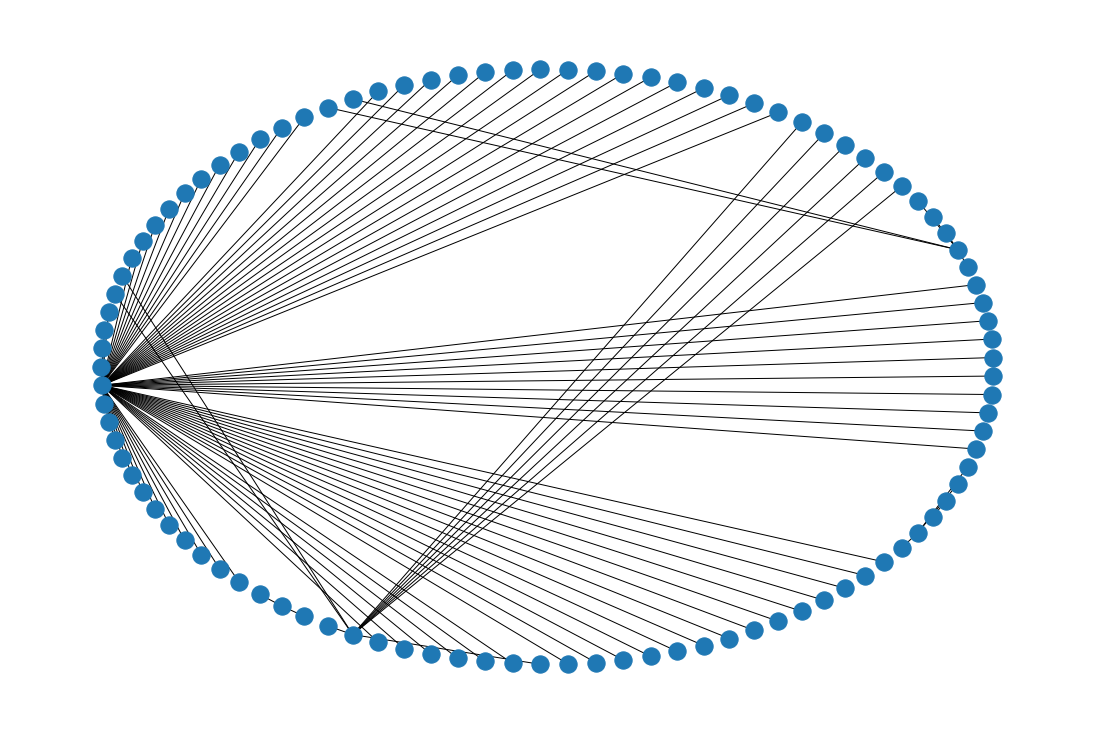

In [70]:
plt.figure(figsize = (15, 10))
nx.draw_shell(graph4)